[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/source/canny.ipynb)

Obtaining Edges using the Canny operator
======================================

In this tutorial we show how easily one can apply the typical canny edge detection using Kornia.

Enjoy the example!

Preparation
---------------

We first install Kornia.

In [ ]:
%%capture
%matplotlib inline
!pip install git+https://github.com/kornia/kornia

In [ ]:
import kornia
kornia.__version__

'0.5.3+a2b2dce'

Now we download the example image.

In [ ]:
%%capture
!wget -O paranoia_agent.jpg https://ih1.redbubble.net/image.675644909.6235/flat,800x800,075,f.u3.jpg

Example
-----------

We first import the required libraries and load the data.

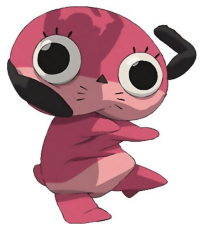

In [ ]:
import torch
import kornia
import cv2
import numpy as np

import matplotlib.pyplot as plt

# read the image with OpenCV
img: np.ndarray = cv2.imread('./paranoia_agent.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# convert to torch tensor
data: torch.tensor = kornia.image_to_tensor(img, keepdim=False)/255.  # BxCxHxW

plt.axis('off')
plt.imshow(img)
plt.show()

To apply a filter, we create the Canny operator object and apply it to the data. It will provide the magnitudes as well as the edges after the hysteresis process. Note that the edges are a binary image which is not differentiable!

In [ ]:
# create the operator
canny = kornia.filters.Canny()

# blur the image
x_magnitude, x_canny = canny(data.float())

That's it! We can compare the source image and the results from the magnitude as well as the edges:

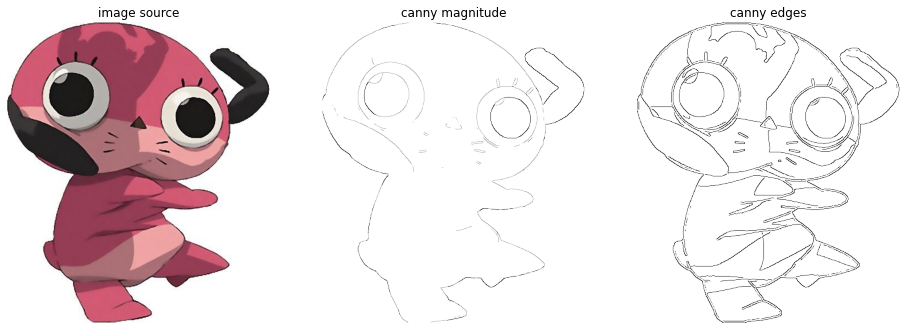

In [ ]:
# convert back to numpy
img_magnitude: np.ndarray = kornia.tensor_to_image(x_magnitude.byte())
img_canny: np.ndarray = kornia.tensor_to_image(x_canny.byte())

# Create the plot
fig, axs = plt.subplots(1, 3, figsize=(16,16))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('image source')
axs[0].imshow(img)

axs[1].axis('off')
axs[1].set_title('canny magnitude')
axs[1].imshow(img_magnitude, cmap='Greys')

axs[2].axis('off')
axs[2].set_title('canny edges')
axs[2].imshow(img_canny, cmap='Greys')

plt.show()

Note that our final result still recovers some edges whose magnitude is quite low. Let us increase the thresholds and compare the final edges.

In [ ]:
# create the operator
canny = kornia.filters.Canny(low_threshold=0.4, high_threshold=0.5)

# blur the image
_, x_canny_threshold = canny(data.float())

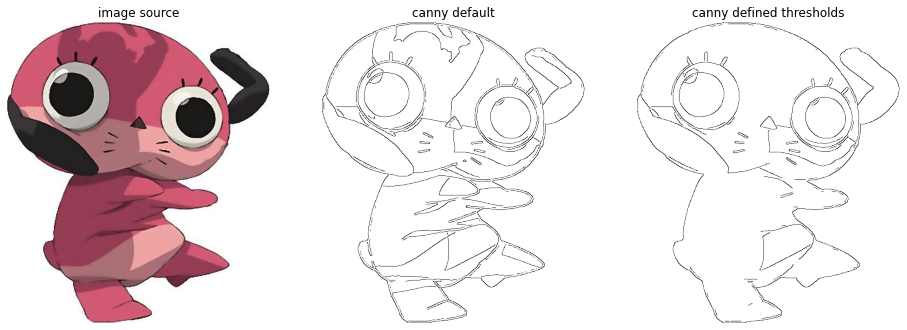

In [ ]:
import torch.nn.functional as F
# convert back to numpy
img_canny_threshold: np.ndarray = kornia.tensor_to_image(x_canny_threshold.byte())

# Create the plot
fig, axs = plt.subplots(1, 3, figsize=(16,16))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('image source')
axs[0].imshow(img)

axs[1].axis('off')
axs[1].set_title('canny default')
axs[1].imshow(img_canny, cmap='Greys')

axs[2].axis('off')
axs[2].set_title('canny defined thresholds')
axs[2].imshow(img_canny_threshold, cmap='Greys')

plt.show()